<span style='font-size:x-large'><u>**With Rotation**</u></span>



In [1]:
#Code checked: 09/28/2024, Dumi

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score
import matplotlib.pyplot as plt
import time

# Load dataset
# Choose file path for the data to load
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter = ",",header=0)


<Axes: >

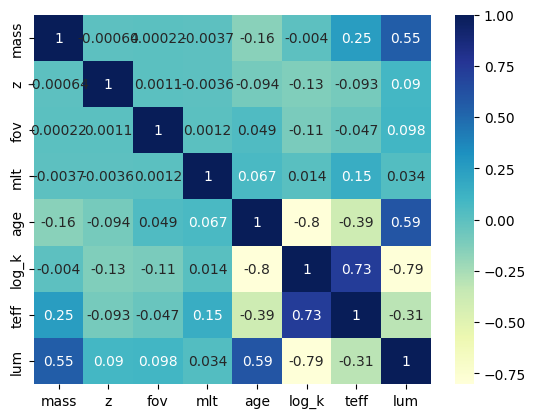

In [3]:
# Generate a heatmap of the correlation matrix
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)

Testing time: 0.052 seconds


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted Values')

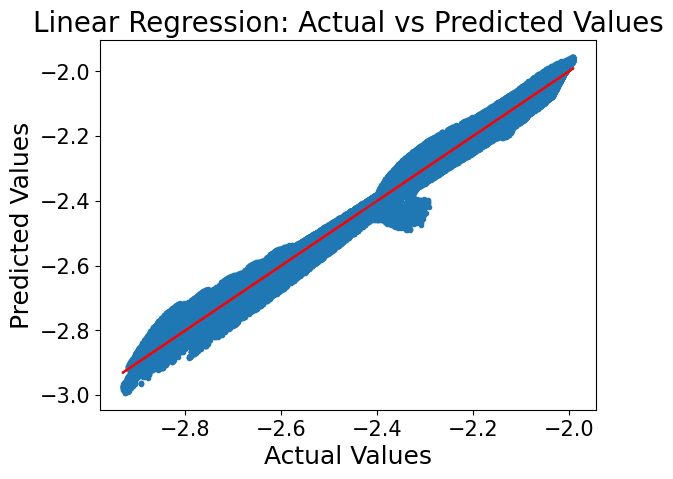

In [2]:
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define features and target variable
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Display the model coefficients
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

# Predict on the test set
start_time = time.time()
predictions = model.predict(x_test)
end_time = time.time()

# Calculate and print the testing time
test_time = end_time - start_time
print(f"Testing time: {test_time:.3f} seconds")

# Plot Actual vs Predicted values
fig, ax = plt.subplots()
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Scatter plot of actual vs predicted values
ax.plot(y_test, predictions, '.')
ax.plot(y_test, y_test, color='r')  # Line representing perfect predictions
ax.set_title('Linear Regression: Actual vs Predicted Values', fontsize=20)

# Show the plot
plt.show()


In [4]:
#Testing the Performance of our Model
from sklearn import metrics

#Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)

#Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

#R2 Score
r2 = metrics.r2_score(y_test, predictions)

#Larger MAE values indicate that the model is poor at prediction. Lower the better.
mae = metrics.mean_absolute_error(y_test, predictions)

print(f'MSE: %.4f' % mse)
print(f'RMSE: %.4f' % rmse)
print("Model accuracy is {}%".format(round(r2, 4) *100))
print("Mean Absolute Error is {}".format(round(mae, 4)))


MSE: 0.0009
RMSE: 0.0301
Model accuracy is 98.33%
Mean Absolute Error is 0.0241


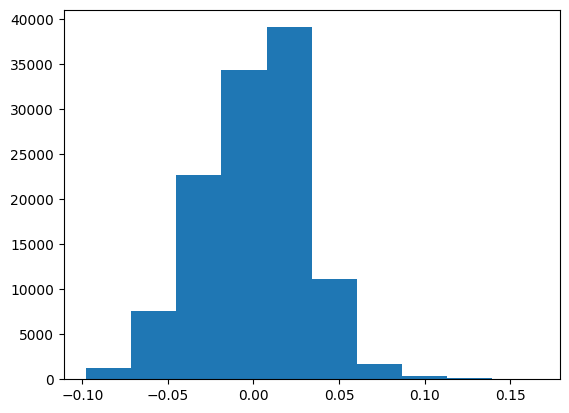

In [10]:
# Plot histogram of residuals (differences between actual and predicted values)
residuals = (y_test - predictions)

# Customize plot appearance
plt.title('Histogram of Linear Regression Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='both', labelsize=15)

# Optional limit settings (uncomment if needed)
# plt.ylim(0, 500)
# plt.xlim(-0.08, 0.08)


## Feature Importance

mlt: 1.2354743169606941e-05
fov: 0.0003913517715856796
z: 0.007924251638371104
mass: 0.09653228732685612
age: 0.1266819925955395
teff: 0.27056098816593077
lum: 0.8203475372492486


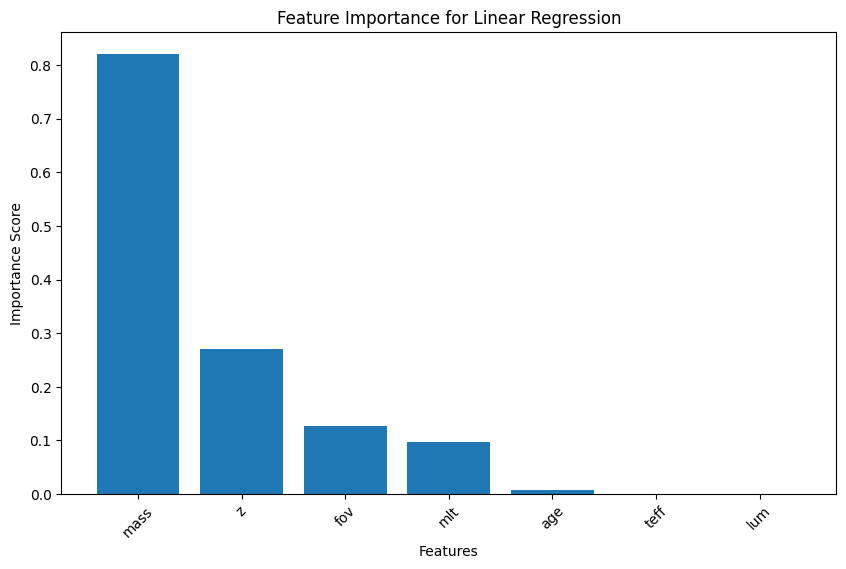

In [4]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Extract the importances and sort the features by their importance scores
importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]
features = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']

# Print each feature and its corresponding importance score
for idx in indices[::-1]:
    print(f"{features[idx]}: {perm_importance.importances_mean[idx]}")

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], tick_label=features)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Linear Regression')

# Rotate feature names
plt.xticks(rotation=45)  
plt.show()

## Recursive Feature Elimination (RFE)

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset from the specified CSV file
file_path = 'new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv'
data = pd.read_csv(file_path, delimiter=",", header=0)

# Define the features (independent variables) and target (dependent variable)
x = data[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = data['log_k']

# Split the data into training and testing sets (30% test data, 70% train data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Display the model's coefficients for each feature
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

# Initialize Recursive Feature Elimination (RFE) with the Linear Regression model
rfe = RFE(estimator=model, n_features_to_select=1)

# Alternatively, RFE can select half of the features if no n_features_to_select is specified
# rfe = RFE(estimator=model)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features after applying RFE
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Print the ranking of features (Rank #1 is the most important feature)
print("Feature Ranking:", rfe.ranking_)


Selected Features: Index(['z'], dtype='object')
Feature Ranking: [4 1 2 3 7 5 6]


## SHAP

In [8]:
# Install and import SHAP library
!pip install shap
import shap

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


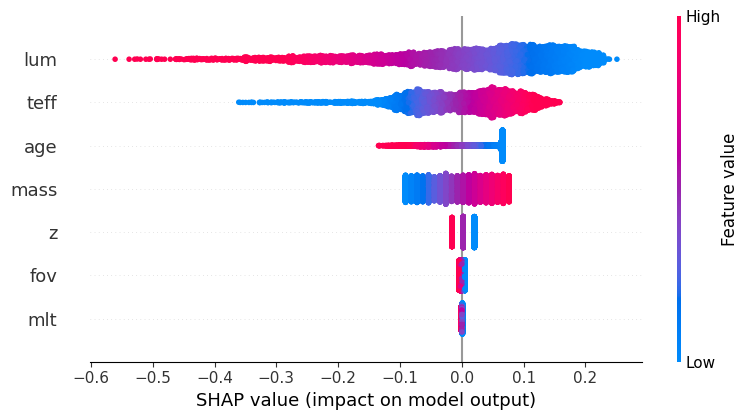

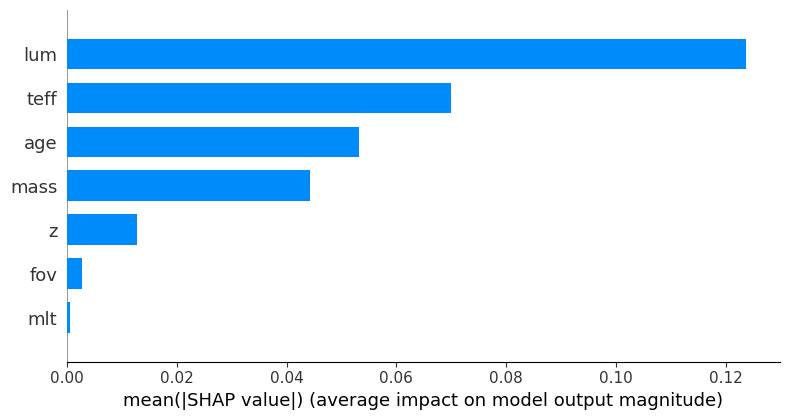

In [11]:

#===============================================================================
X_train_sample=pd.DataFrame(x_train).sample(n=5000, random_state=41).to_numpy()
X_test_sample=pd.DataFrame(x_test).sample(n=5000, random_state=45).to_numpy()
#===============================================================================

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train_sample)

# Get SHAP values for a subset of the test set
shap_values = explainer(X_test_sample)

# Plot feature importance bar chart
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")

